In [1]:
# Import the work-in-progress-wrangled dataset from last week

DATA_PATH = './notebooks/vgsalesWranglePrevWeek.csv'
import pandas as pd
import numpy as np
df = pd.read_csv(DATA_PATH, na_values=['Unknown'])
pd.set_option('display.max_columns', 23)
pd.set_option("display.max_rows", 100)
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,Sold_100k,All_Sales_Transformed
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,82.86,True,4.429149
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,40.24,True,3.719409
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,8.7,37.14,True,3.641264
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,36.60,True,3.627004
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,8.8,33.09,True,3.529004


In [2]:
df.head(30)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,Sold_100k,All_Sales_Transformed
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,82.86,True,4.429149
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,40.24,True,3.719409
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,8.7,37.14,True,3.641264
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,36.60,True,3.627004
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,8.8,33.09,True,3.529004
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,31.38,NaN,NaN,NaN,NaN,NaN,1998.0,NaN,31.38,True,3.477541
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.80,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,30.80,True,3.459466
7,8,Tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,30.26,NaN,NaN,NaN,NaN,NaN,1989.0,NaN,30.26,True,3.442339
8,9,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,30.22,NaN,NaN,NaN,NaN,NaN,2009.0,9.1,30.22,True,3.441059
9,10,Minecraft,Misc,NaN,PC,Mojang,Mojang AB,10.0,NaN,30.01,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,30.01,True,3.434310


In [3]:
# Create column that takes the mean critic, user, and vgchartz score
# Function that does the conversion
def generate_average_score(critic,user,vgchartz):
    culminated = 0
    nonNull = 3
    if (np.isnan(critic)):
        nonNull -= 1
    else:
        culminated += critic
    if (np.isnan(user)):
        nonNull -= 1
    else:
        culminated += user
    if (np.isnan(vgchartz)):
        nonNull -= 1
    else:
        culminated += vgchartz
    if (nonNull == 0):
        return np.nan
    else:
        return culminated/nonNull
    


In [4]:
df['Average_Score'] = 0

In [5]:
# Add in the average scores for every column
for i in range(0,df.shape[0]):
    df['Average_Score'][i] = generate_average_score(df['Critic_Score'][i],df['User_Score'][i],df['Vgchartzscore'][i])

/Users/timothy/miniconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/timothy/miniconda3/envs/unit2/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
# Verify the conversion worked
df['Average_Score'].head(20)

0      7.000000
1     10.000000
2      8.000000
3           NaN
4      8.533333
5      9.400000
6      8.600000
7           NaN
8      8.966667
9     10.000000
10          NaN
11     5.233333
12     6.450000
13     8.400000
14     9.250000
15     9.200000
16     7.950000
17     8.000000
18     8.500000
19     9.400000
Name: Average_Score, dtype: float64

In [7]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,Sold_100k,All_Sales_Transformed,Average_Score
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,82.86,True,4.429149,7.000000
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,40.24,True,3.719409,10.000000
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,8.7,37.14,True,3.641264,8.000000
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,36.60,True,3.627004,NaN
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,8.8,33.09,True,3.529004,8.533333


In [8]:
# Create column that gets the number of platforms the given game exists on
# valueDict Converts the pandas value counts of every game name to a dict for parsing
valueDict = df['Name'].value_counts().to_dict()

In [9]:
# Function that returns each dictionary value
def check_platform_count(x):
    return valueDict.get(x)

In [10]:
# Do a test run to check the function works
print(check_platform_count('FIFA 14'))
print(check_platform_count('Wii Sports'))

9
1


In [11]:
# Create the new column with 0's at first
df['Number_Platforms'] = 0

In [12]:
# Add the proper numbers for every row in column
for j in range(0,df.shape[0]):
    df['Number_Platforms'][j] = check_platform_count(df['Name'][j])

/Users/timothy/miniconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Verify the conversion worked
df.head(7)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,Sold_100k,All_Sales_Transformed,Average_Score,Number_Platforms
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,82.86,True,4.429149,7.000000,1
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,40.24,True,3.719409,10.000000,1
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,8.7,37.14,True,3.641264,8.000000,1
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,36.60,True,3.627004,NaN,3
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,8.8,33.09,True,3.529004,8.533333,1
5,6,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,Game Freak,9.4,NaN,31.38,NaN,NaN,NaN,NaN,NaN,1998.0,NaN,31.38,True,3.477541,9.400000,1
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,30.80,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,30.80,True,3.459466,8.600000,1


In [14]:
check_platform_count(df['Name'][7])

2

In [15]:
df['Publisher'].value_counts().quantile(q=0.8)

11.0

In [16]:
# Create new column that shows how many games the publisher of the given game has published within the dataset

# The process is similar to the number of platforms column

publisherDict = df['Publisher'].value_counts().to_dict()

In [17]:
def check_publisher_count(x):
    return publisherDict.get(x)

In [18]:
df['Number_Games_From_Publisher'] = 0

In [19]:
for j in range(0,df.shape[0]):
    df['Number_Games_From_Publisher'][j] = check_publisher_count(df['Publisher'][j])

/Users/timothy/miniconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# Fill null average scores with -0.1 so they can be parsed by the random forest classifier
df['Average_Score'] = df['Average_Score'].fillna(-0.1)

In [21]:
df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,Sold_100k,All_Sales_Transformed,Average_Score,Number_Platforms,Number_Games_From_Publisher
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,NaN,82.86,True,4.429149,7.000000,1,753.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0,NaN,40.24,True,3.719409,10.000000,1,753.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0,8.7,37.14,True,3.641264,8.000000,1,753.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0,NaN,36.60,True,3.627004,-0.100000,3,1.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0,8.8,33.09,True,3.529004,8.533333,1,753.0


In [22]:
# Define features/target

target='Sold_100k'

features=['Genre','ESRB_Rating','Platform','Average_Score','Year','Number_Platforms','Number_Games_From_Publisher']

In [23]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df,random_state=84)
train.shape, val.shape

((14896, 23), (4966, 23))

In [24]:
train.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,Sold_100k,All_Sales_Transformed,Average_Score,Number_Platforms,Number_Games_From_Publisher
13652,13653,Superman Returns,Action,E,DS,Electronic Arts,EA Tiburon,3.8,NaN,NaN,0.07,0.07,0.00,NaN,0.01,2006.0,NaN,0.07,False,0.067659,3.8,2,822.0
1955,1956,Enter the Matrix,Action,T,XB,Atari,Shiny Entertainment,NaN,NaN,NaN,1.20,0.72,0.43,0.01,0.04,2003.0,NaN,1.20,True,0.788457,-0.1,3,326.0
16828,16829,MapleStory DS,Role-Playing,NaN,DS,Nexon,Nexon,NaN,NaN,NaN,0.03,NaN,NaN,0.03,NaN,2010.0,NaN,0.03,False,0.029559,-0.1,1,1.0
8783,8784,3rd Super Robot Wars Z: Tengoku-Hen,Action,NaN,PSV,Namco Bandai Games,Banpresto,NaN,NaN,NaN,0.20,NaN,NaN,0.20,NaN,2015.0,NaN,0.20,True,0.182322,-0.1,2,373.0
1573,1574,Frogger 2: Swampy's Revenge,Action,E,PS,Hasbro Interactive,Blitz Games,NaN,NaN,NaN,1.43,0.80,0.54,NaN,0.09,2000.0,NaN,1.43,True,0.887891,-0.1,1,21.0


In [25]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [26]:
# Make the pipeline for the train/val set
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

pipelineTrainVal = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=200,random_state=235,n_jobs=-1)
)

# Fit on train
pipelineTrainVal.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Genre', 'ESRB_Rating', 'Platform'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Genre',
                                          'data_type': dtype('O'),
                                          'mapping': Action               1
Role-Playing         2
Fighting             3
Simulation           4
Adventure            5
Sports               6
Misc                 7
Platform             8
Strategy             9
Action-Adventure    10
Puzzle              11
Shooter             12
Visual Nove...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=

In [27]:
# Score on validate
print('Validation Accuracy', pipelineTrainVal.score(X_val, y_val))

# Make a prediction
y_pred = pipelineTrainVal.predict(X_val)

Validation Accuracy 0.7799033427305678


In [28]:
# Make the pipeline that will be used in the Web app
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

X = df[features]
y = df[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=200,random_state=235,n_jobs=-1)
)

# Fit on train
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Genre', 'ESRB_Rating', 'Platform'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Genre',
                                          'data_type': dtype('O'),
                                          'mapping': Sports               1
Platform             2
Racing               3
Shooter              4
Role-Playing         5
Puzzle               6
Misc                 7
Party                8
Simulation           9
Action              10
Action-Adventure    11
Fighting            12
Strategy            13
Advent...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                     

In [29]:
# Pickle the pipeline
from joblib import dump
dump(pipeline, 'pipeline.joblib', compress=True)

['pipeline.joblib']

In [30]:
# Transform dataset to view the permutation table
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100,random_state=235,n_jobs=-1)
model.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=235, verbose=0,
                       warm_start=False)

In [31]:
import eli5
from eli5.sklearn import PermutationImportance
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=84
)

permuter.fit(X_val_transformed,y_val)

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Number_Games_From_Publisher    0.071365
Year                           0.066452
Platform                       0.064640
Average_Score                  0.036770
ESRB_Rating                    0.030769
Number_Platforms               0.026460
Genre                          0.008578
dtype: float64

In [32]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)

Weight,Feature
0.0714 ± 0.0106,Number_Games_From_Publisher
0.0665 ± 0.0072,Year
0.0646 ± 0.0061,Platform
0.0368 ± 0.0060,Average_Score
0.0308 ± 0.0070,ESRB_Rating
0.0265 ± 0.0056,Number_Platforms
0.0086 ± 0.0065,Genre


In [33]:
# Create PDP plots
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

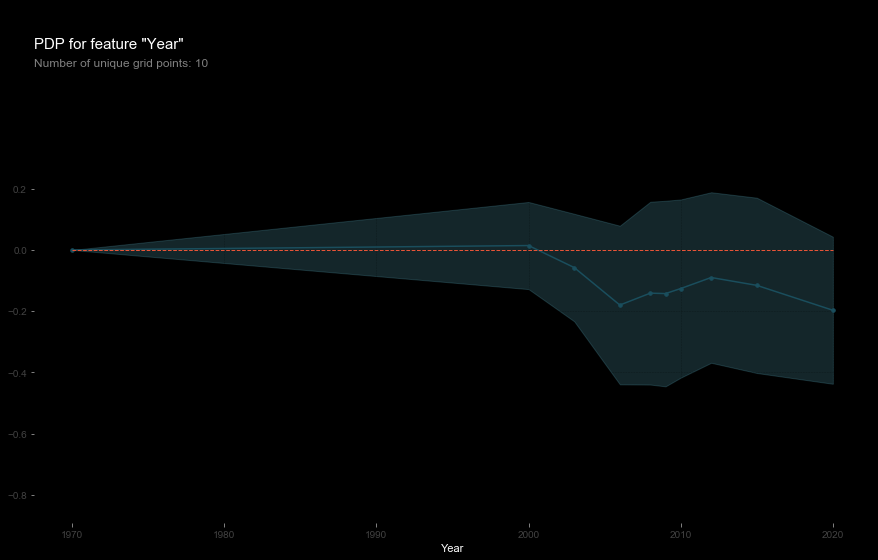

In [34]:
feature = 'Year'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

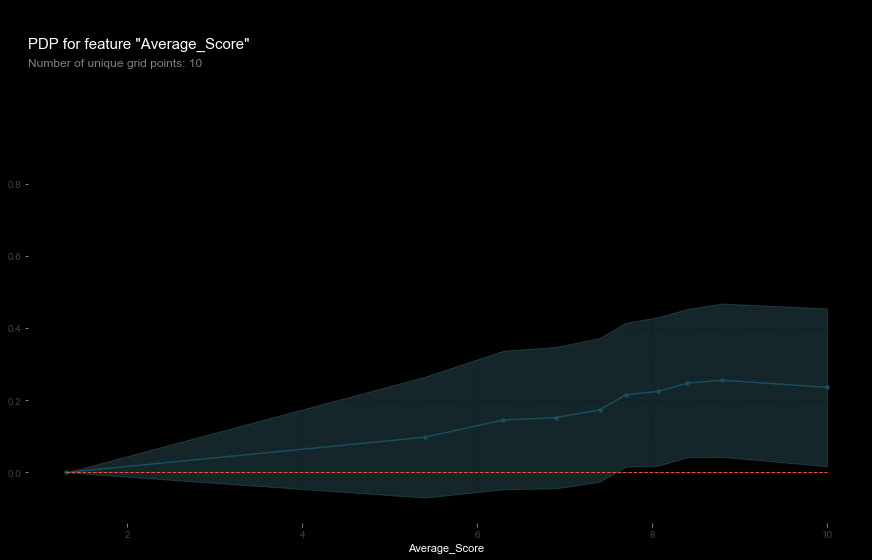

In [35]:
feature = 'Average_Score'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val[X_val['Average_Score']>-0.1], 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

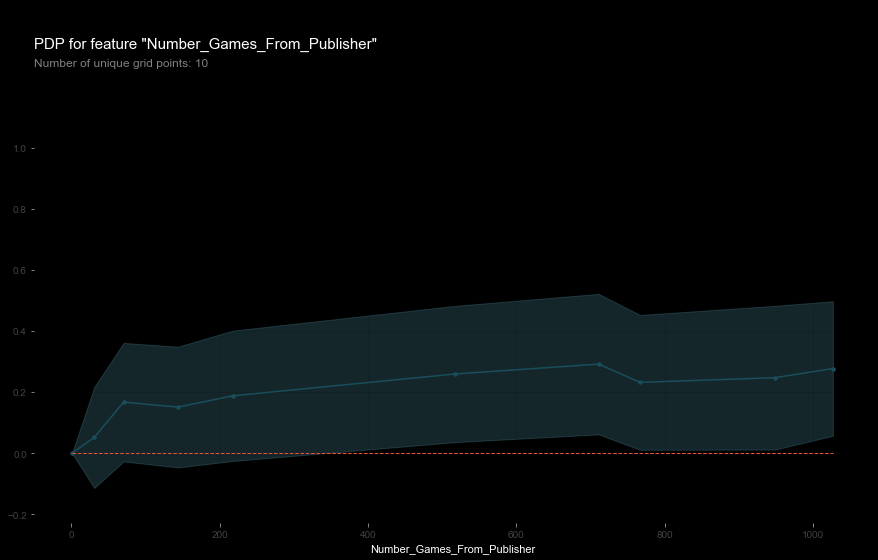

In [36]:
feature = 'Number_Games_From_Publisher'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val.dropna(), 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [37]:
# Gather data about average sales based on ESRB ratings
df[df['ESRB_Rating']=='E'].describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,All_Sales_Transformed,Average_Score,Number_Platforms,Number_Games_From_Publisher
count,5927.000000,1523.000000,39.000000,325.000000,5602.000000,5248.000000,4572.000000,840.00000,5455.000000,5926.000000,91.000000,5927.000000,5927.000000,5927.000000,5927.000000,5898.000000
mean,9059.835161,7.184504,8.617949,4.943108,0.417158,0.250728,0.148436,0.14725,0.039624,2005.966757,7.739560,0.665333,0.342045,1.787630,2.175637,431.621567
std,5489.527388,1.422393,1.196018,7.579393,0.724088,0.389965,0.385774,0.21000,0.116884,5.139775,1.309527,2.167545,0.442247,3.275007,1.644911,342.775305
min,1.000000,1.500000,4.500000,0.030000,0.010000,0.000000,0.000000,0.00000,0.000000,1989.000000,3.000000,0.010000,0.009950,-0.100000,1.000000,1.000000
25%,4327.000000,6.400000,8.200000,1.370000,0.070000,0.050000,0.010000,0.02000,0.000000,2002.000000,7.050000,0.080000,0.076961,-0.100000,1.000000,75.000000
50%,8843.000000,7.400000,9.000000,2.310000,0.180000,0.120000,0.040000,0.07000,0.010000,2006.000000,8.000000,0.200000,0.182322,-0.100000,1.000000,518.000000
75%,13592.000000,8.200000,9.350000,5.220000,0.460000,0.280000,0.130000,0.18000,0.030000,2009.000000,8.600000,0.530000,0.425268,4.000000,3.000000,753.000000
max,19857.000000,10.000000,10.000000,82.860000,11.800000,4.260000,8.640000,1.46000,2.930000,2020.000000,9.600000,82.860000,4.429149,10.000000,9.000000,1027.000000


In [38]:
df[df['ESRB_Rating']=='EC'].describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,All_Sales_Transformed,Average_Score,Number_Platforms,Number_Games_From_Publisher
count,25.000000,0.0,0.0,1.00,24.000000,24.000000,12.000000,0.0,24.000000,25.00000,0.0,25.000000,25.000000,2.500000e+01,25.000000,25.000000
mean,9527.520000,NaN,NaN,0.15,0.222917,0.177500,0.059167,NaN,0.015417,2007.48000,NaN,0.220000,0.192727,-1.000000e-01,2.040000,98.200000
std,3744.618562,NaN,NaN,NaN,0.141098,0.125638,0.056642,NaN,0.011788,4.84011,NaN,0.138894,0.112557,1.416396e-17,1.098484,147.641458
min,4550.000000,NaN,NaN,0.15,0.030000,0.010000,0.000000,NaN,0.000000,1998.00000,NaN,0.030000,0.029559,-1.000000e-01,1.000000,1.000000
25%,6651.000000,NaN,NaN,0.15,0.095000,0.075000,0.010000,NaN,0.007500,2005.00000,NaN,0.100000,0.095310,-1.000000e-01,1.000000,19.000000
50%,8772.000000,NaN,NaN,0.15,0.220000,0.145000,0.050000,NaN,0.020000,2010.00000,NaN,0.200000,0.182322,-1.000000e-01,2.000000,40.000000
75%,12201.000000,NaN,NaN,0.15,0.310000,0.272500,0.090000,NaN,0.020000,2010.00000,NaN,0.310000,0.270027,-1.000000e-01,3.000000,127.000000
max,17127.000000,NaN,NaN,0.15,0.500000,0.420000,0.190000,NaN,0.040000,2015.00000,NaN,0.500000,0.405465,-1.000000e-01,5.000000,718.000000


In [39]:
df[df['ESRB_Rating']=='E10'].describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,All_Sales_Transformed,Average_Score,Number_Platforms,Number_Games_From_Publisher
count,1884.000000,635.000000,23.000000,101.000000,1783.000000,1657.000000,1431.000000,319.000000,1738.000000,1884.000000,88.000000,1884.000000,1884.000000,1884.000000,1884.000000,1874.000000
mean,9130.527601,7.069291,8.269565,2.455941,0.400808,0.232861,0.151398,0.086489,0.048423,2010.505839,7.460227,0.510982,0.315473,2.361837,3.214437,440.488794
std,5444.435424,1.376453,1.573772,2.942714,0.673841,0.376405,0.276707,0.189565,0.102774,3.893493,1.242128,1.050707,0.371008,3.500262,2.158037,374.473994
min,49.000000,2.000000,3.800000,0.110000,0.010000,0.000000,0.000000,0.000000,0.000000,1970.000000,3.200000,0.010000,0.009950,-0.100000,1.000000,1.000000
25%,4449.750000,6.400000,8.000000,0.940000,0.070000,0.060000,0.010000,0.010000,0.010000,2008.000000,6.900000,0.080000,0.076961,-0.100000,1.000000,126.000000
50%,8708.500000,7.400000,8.500000,1.540000,0.190000,0.120000,0.050000,0.030000,0.020000,2010.000000,7.800000,0.200000,0.182322,-0.100000,3.000000,243.000000
75%,13512.000000,8.000000,9.150000,2.790000,0.450000,0.250000,0.170000,0.090000,0.050000,2013.000000,8.500000,0.520000,0.418710,6.500000,5.000000,822.000000
max,19841.000000,10.000000,10.000000,13.760000,10.140000,5.950000,3.130000,2.690000,1.680000,2020.000000,9.000000,13.760000,2.691921,10.000000,9.000000,1027.000000


In [40]:
df[df['ESRB_Rating']=='T'].describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,All_Sales_Transformed,Average_Score,Number_Platforms,Number_Games_From_Publisher
count,3934.000000,1481.000000,86.000000,210.000000,3724.000000,3342.000000,3184.000000,1111.000000,3565.000000,3934.000000,174.000000,3934.000000,3934.000000,3934.000000,3934.000000,3909.000000
mean,9032.498983,7.260972,8.650000,1.991286,0.433974,0.254719,0.147654,0.113717,0.047015,2007.315709,7.526437,0.517105,0.322101,2.744747,2.285206,409.921207
std,5382.621326,1.376449,0.885405,2.395167,0.725677,0.401496,0.298399,0.175667,0.104209,5.493539,1.407902,0.962250,0.374066,3.689939,1.506659,358.248662
min,53.000000,1.400000,6.000000,0.100000,0.010000,0.000000,0.000000,0.000000,0.000000,1970.000000,3.000000,0.010000,0.009950,-0.100000,1.000000,1.000000
25%,4294.000000,6.500000,8.025000,0.445000,0.070000,0.050000,0.020000,0.020000,0.000000,2003.000000,6.825000,0.080000,0.076961,-0.100000,1.000000,86.000000
50%,8896.500000,7.500000,8.800000,1.180000,0.185000,0.110000,0.050000,0.060000,0.010000,2007.000000,7.800000,0.200000,0.182322,-0.100000,2.000000,243.000000
75%,13406.500000,8.200000,9.300000,2.452500,0.472500,0.270000,0.150000,0.130000,0.040000,2011.000000,8.675000,0.540000,0.431782,6.975000,3.000000,753.000000
max,19859.000000,10.000000,10.000000,13.290000,8.030000,3.810000,6.460000,2.170000,1.480000,2020.000000,9.400000,13.290000,2.659560,10.000000,8.000000,1027.000000


In [41]:
df[df['ESRB_Rating']=='M'].describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Vgchartzscore,All_Sales,All_Sales_Transformed,Average_Score,Number_Platforms,Number_Games_From_Publisher
count,2117.000000,925.000000,76.000000,187.000000,1930.000000,1747.000000,1758.000000,675.000000,1889.000000,2117.000000,145.000000,2117.000000,2117.000000,2117.000000,2117.000000,2113.000000
mean,7668.693434,7.547027,8.527632,1.923209,0.834896,0.462547,0.316206,0.086830,0.099783,2009.401039,7.791724,0.931030,0.461750,3.302637,2.447331,387.569806
std,5597.156103,1.456715,0.941290,2.572059,1.814461,0.958317,0.714032,0.128553,0.245129,5.592347,1.444794,1.917878,0.522485,3.915604,1.302422,351.376030
min,20.000000,1.000000,5.700000,0.100000,0.010000,0.000000,0.000000,0.000000,0.000000,1970.000000,3.100000,0.010000,0.009950,-0.100000,1.000000,1.000000
25%,2706.000000,6.800000,8.000000,0.510000,0.100000,0.070000,0.030000,0.020000,0.010000,2005.000000,7.200000,0.110000,0.104360,-0.100000,1.000000,96.000000
50%,6803.000000,7.900000,8.700000,1.140000,0.260000,0.160000,0.090000,0.040000,0.020000,2010.000000,8.200000,0.300000,0.262364,-0.100000,2.000000,201.000000
75%,12106.000000,8.600000,9.300000,2.220000,0.760000,0.420000,0.287500,0.100000,0.080000,2014.000000,8.800000,0.890000,0.636577,7.600000,3.000000,718.000000
max,19851.000000,10.000000,10.000000,17.300000,20.320000,9.760000,9.850000,1.080000,3.120000,2019.000000,9.500000,20.320000,3.059646,10.000000,7.000000,1027.000000


In [42]:
# Print out the python library versions
import joblib
import sklearn
import category_encoders as ce
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')

joblib==0.13.2
scikit-learn==0.21.3
category_encoders==2.1.0


In [43]:
# Display the mean baseline
df['Sold_100k'].value_counts(normalize=True)

True     0.636492
False    0.363508
Name: Sold_100k, dtype: float64

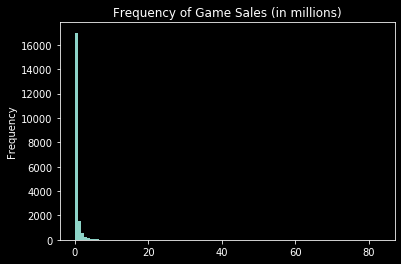

In [44]:
# Create histogram that demonstrates why I went with classification
df['All_Sales'].plot(kind='hist',bins=100,title='Frequency of Game Sales (in millions)')